In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
%autosave 20


Autosaving every 20 seconds


In [3]:
df = pd.read_csv("Live.csv")

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

## pre processamento

## valores ausentes

In [6]:
df.isnull().sum()  

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

# estatisticas

In [7]:
df.describe()  

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


## verificando  tipos de instancias em cada couna nao numérica


In [8]:
print(len(df['status_id'].unique()))
print(len(df['status_published'].unique()))
print(len(df['status_type'].unique()))
print(len(df['Column1'].unique()))
print(len(df['Column2'].unique()))
print(len(df['Column3'].unique()))
print(len(df['Column4'].unique()))
print(len(df['status_type'].unique()))




6997
6913
4
1
1
1
1
4


## removendo colunas com alta quantidade de atributos diferentes, ou irrelevantes (NAN)

In [9]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1, inplace=True)

In [10]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [11]:
df.shape

(7050, 10)

# duplicadas

In [12]:
pd.set_option('display.max_rows', None)
df[df.duplicated(keep=False)].shape



(2521, 10)

In [13]:
df.drop_duplicates(keep = 'first', inplace = True)

In [14]:
df.shape

(4987, 10)

# divisao da base em entradas e saida

In [15]:
x = df

y = df['status_type']


In [16]:
y

0        video
1        photo
2        video
3        photo
4        photo
5        photo
6        video
7        video
8        photo
9        photo
10       photo
11       photo
12       photo
13       photo
14       photo
15       video
16       video
17       video
18       video
19       photo
20       photo
21       photo
22       photo
23       video
24       photo
25       video
26       video
27       video
28       photo
29       video
30       photo
31       video
32       photo
33       photo
34       photo
35       photo
36       video
37       photo
38       photo
39       video
40       video
41       video
42       video
43       video
44       photo
45       video
46       photo
47       video
48       video
49       video
50       photo
51       video
52       photo
53       video
54       video
55       video
56       video
57       video
58       video
59       video
60       photo
61       video
62       photo
63       video
64       photo
65       photo
66       v

# convertendo variavel statys type para categoria numerica

In [17]:
le = LabelEncoder()

x['status_type'] = le.fit_transform(x['status_type'])

y = le.transform(y)



In [18]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## correlação

In [19]:
correl = x.corr()
correl.style.background_gradient(cmap = 'coolwarm')

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,1.000000,0.083964,0.346349,0.424454,0.042570,0.421731,0.096132,0.186597,0.088522,0.146692
num_reactions,0.083964,1.000000,0.115832,0.216485,0.994276,0.268827,0.247059,0.154776,0.055539,0.111795
num_comments,0.346349,0.115832,1.000000,0.629457,0.064419,0.505862,0.151545,0.313187,0.245972,0.227398
num_shares,0.424454,0.216485,0.629457,1.000000,0.133215,0.813046,0.401438,0.388001,0.204206,0.320390
num_likes,0.042570,0.994276,0.064419,0.133215,1.000000,0.166203,0.182684,0.096318,0.030460,0.070990
num_loves,0.421731,0.268827,0.505862,0.813046,0.166203,1.000000,0.504224,0.498701,0.211859,0.384172
num_wows,0.096132,0.247059,0.151545,0.401438,0.182684,0.504224,1.000000,0.281244,0.083116,0.184150
num_hahas,0.186597,0.154776,0.313187,0.388001,0.096318,0.498701,0.281244,1.000000,0.144524,0.216208
num_sads,0.088522,0.055539,0.245972,0.204206,0.030460,0.211859,0.083116,0.144524,1.000000,0.134941
num_angrys,0.146692,0.111795,0.227398,0.320390,0.070990,0.384172,0.184150,0.216208,0.134941,1.000000


## drop em colunas altamente relacionadas, mantendo apenas as que detem maior relacao com status_type

 a coluna num likes esta altamente relacionada a num reactions, foi decidido entao manter apenas num reactions que apresenta uma maior correlacao com status type.
 o mesmo criterio foi utilizado para avaliar a correlacao de num loves x num shares

In [20]:
x.drop(['num_likes'], axis=1, inplace=True) 

In [21]:
x.drop(['num_loves'], axis=1, inplace=True)

In [22]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,3,1,1,0
1,1,150,0,0,0,0,0,0
2,3,227,236,57,1,1,0,0
3,1,111,0,0,0,0,0,0
4,1,213,0,0,0,0,0,0


In [23]:
from scipy import stats
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, decomposition, cluster, model_selection, metrics, manifold

In [365]:
label_kmeans = []
labels_hiesimples = []
labels_hiecompleto = []
silhueta = []

intera = [i**2 for i in range (2, 10)]

for n in intera:
    
    kmeans_r = cluster.KMeans(n_clusters=n,init ="random").fit(x) 
    print('inertia para', n , 'clusters: ' , kmeans_r.inertia_)
    
    labelsk = kmeans_r.labels_
    correct_labelsk = sum(y == labelsk)
    print("Result: %d out of %d samples were correctly labeled." % (correct_labelsk, y.size))

    #######################
    
    
    
    cluster_kmeans = x.assign(cluster_numero = kmeans_r.predict(x))
   

    hierarquico_simples = cluster.AgglomerativeClustering(n_clusters=n, linkage="single")
    hierarquico_completo = cluster.AgglomerativeClustering(n_clusters=n, linkage="complete")
    
    cluster_hierarquico_simples = x.assign(cluster_numero = hierarquico_simples.fit_predict(x)) 
    cluster_hierarquico_completo = x.assign(cluster_numero = hierarquico_completo.fit_predict(x))
    
    
    label_kmeans.append(cluster_kmeans)
    labels_hiesimples.append(cluster_hierarquico_simples)
    labels_hiecompleto.append(cluster_hierarquico_completo)
    
    silhueta.append({ "Número de Clusters": n, 
                     "K-Means - aleatório": metrics.silhouette_score(cluster_kmeans,labels = cluster_kmeans['cluster_numero']),
                    "Hierarquico Simples": metrics.silhouette_score(cluster_hierarquico_simples,labels = cluster_hierarquico_simples['cluster_numero']),
                    "Hierarquico Completo": metrics.silhouette_score(cluster_hierarquico_completo,labels = cluster_hierarquico_completo['cluster_numero'])})

inertia para 4 clusters:  1573900246.8312376
Result: 139 out of 4987 samples were correctly labeled.
inertia para 9 clusters:  480079761.4501137
Result: 78 out of 4987 samples were correctly labeled.
inertia para 16 clusters:  217625735.65231943
Result: 157 out of 4987 samples were correctly labeled.
inertia para 25 clusters:  143941515.85071996
Result: 68 out of 4987 samples were correctly labeled.
inertia para 36 clusters:  108382069.35438229
Result: 44 out of 4987 samples were correctly labeled.
inertia para 49 clusters:  99601818.34493768
Result: 5 out of 4987 samples were correctly labeled.
inertia para 64 clusters:  97224889.86195348
Result: 151 out of 4987 samples were correctly labeled.
inertia para 81 clusters:  91084769.51451546
Result: 31 out of 4987 samples were correctly labeled.


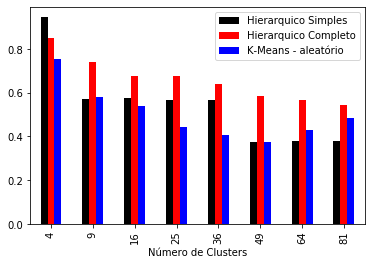

In [321]:
pd.DataFrame(silhueta).plot.bar(x="Número de Clusters",
                                        y =["Hierarquico Simples","Hierarquico Completo","K-Means - aleatório"], color = ['black', 'red', 'blue'])

## normalizacao


In [322]:
normal = preprocessing.RobustScaler()

normalizacao = pd.DataFrame(normal.fit_transform(x),columns = x.columns.values)

normalizacao.head()

,status_type,num_reactions,num_comments,num_shares,num_wows,num_hahas,num_sads,num_angrys
0,1.0,1.605691,5.770115,16.3125,3.0,1.0,1.0,0.0
1,0.0,0.065041,-0.114943,-0.0625,0.0,0.0,0.0,0.0
2,1.0,0.378049,2.597701,3.5000,1.0,1.0,0.0,0.0
3,0.0,-0.093496,-0.114943,-0.0625,0.0,0.0,0.0,0.0
4,0.0,0.321138,-0.114943,-0.0625,0.0,0.0,0.0,0.0


In [363]:
silhuet = []
labelnor_kmeans = []
labelsnor_hiesimples = []
labelsnor_hiecompleto = []

for n in intera:
    
    kmeans_r = cluster.KMeans(n_clusters=n,init ="random").fit(normalizacao)
    print('inertia para', n , 'clusters: ' , kmeans_r.inertia_)
    
    labelsk = kmeans_r.labels_
    correct_labelsk = sum(y == labelsk)
    print("Result: %d out of %d samples were correctly labeled." % (correct_labelsk, y.size))

    #######################
    
    
    hierarquico_simples = cluster.AgglomerativeClustering(n_clusters=n, linkage="single")
   
    ###############################
    
    hierarquico_completo = cluster.AgglomerativeClustering(n_clusters=n, linkage="complete")
   
    
    ###########################
    
    
    
    cluster_kmeans = normalizacao.assign(cluster_numero = kmeans_r.predict(normalizacao))
    
    cluster_hierarquico_simples = normalizacao.assign(cluster_numero = hierarquico_simples.fit_predict(normalizacao)) 
    cluster_hierarquico_completo = normalizacao.assign(cluster_numero = hierarquico_completo.fit_predict(normalizacao))
    
    labelnor_kmeans.append(cluster_kmeans)
    labelsnor_hiesimples.append(cluster_hierarquico_simples)
    labelsnor_hiecompleto.append(cluster_hierarquico_completo)
    
    silhuet.append({ "Número de Clusters": n, 
                     "K-Means - aleatório": metrics.silhouette_score(cluster_kmeans,labels = cluster_kmeans['cluster_numero']),
                    "Hierarquico Simples": metrics.silhouette_score(cluster_hierarquico_simples,labels = cluster_hierarquico_simples['cluster_numero']),
                    "Hierarquico Completo": metrics.silhouette_score(cluster_hierarquico_completo,labels = cluster_hierarquico_completo['cluster_numero'])})

inertia para 4 clusters:  589999.6724437145
Result: 2803 out of 4987 samples were correctly labeled.
inertia para 9 clusters:  335299.82901501155
Result: 587 out of 4987 samples were correctly labeled.
inertia para 16 clusters:  224782.11682838926
Result: 31 out of 4987 samples were correctly labeled.
inertia para 25 clusters:  168576.95907887715
Result: 2028 out of 4987 samples were correctly labeled.
inertia para 36 clusters:  133597.8474634226
Result: 15 out of 4987 samples were correctly labeled.
inertia para 49 clusters:  118232.87636223473
Result: 19 out of 4987 samples were correctly labeled.
inertia para 64 clusters:  127952.89229290557
Result: 65 out of 4987 samples were correctly labeled.
inertia para 81 clusters:  93623.87447130792
Result: 89 out of 4987 samples were correctly labeled.


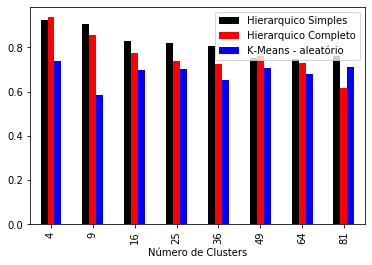

In [324]:
pd.DataFrame(silhuet).plot.bar(x="Número de Clusters",
                                        y =["Hierarquico Simples","Hierarquico Completo","K-Means - aleatório"], color = ['black', 'red', 'blue'])

In [360]:
print('inertia para', n , 'clusters: ' , kmeans_r.inertia_)

labels = kmeans_r.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


inertia para 81 clusters:  90577.06276401972


In [325]:
pcametrics = normalizacao.copy()

In [330]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(pcametrics)
pcametrics = pd.DataFrame(reduced_data)





In [332]:
pcametrics.head()

,0,1
0,9.449072,0.783311
1,-5.449788,-0.050925
2,-0.930637,-0.220294
3,-5.454833,-0.056838
4,-5.441639,-0.041372


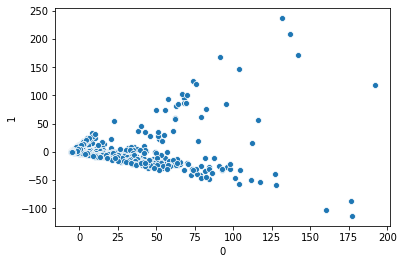

In [343]:
sns.scatterplot(x = pcametrics[0], y = pcametrics[1], data = pcametrics)

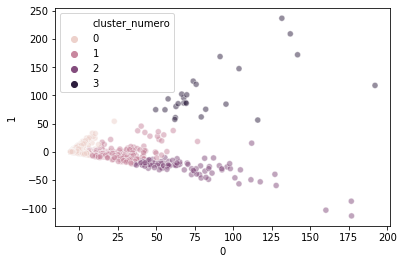

In [345]:
sns.scatterplot(x = pcametrics[0], y = pcametrics[1], hue = labelnor_kmeans[0]['cluster_numero'], legend = 'brief',  alpha = 0.5)

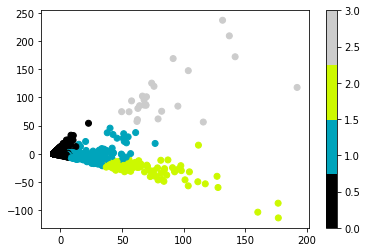

In [355]:
plt.figure()
plt.scatter(pcametrics[0], pcametrics[1], c=labelnor_kmeans[0]['cluster_numero'], cmap=plt.cm.get_cmap('nipy_spectral', 4))
plt.colorbar()
plt.show()

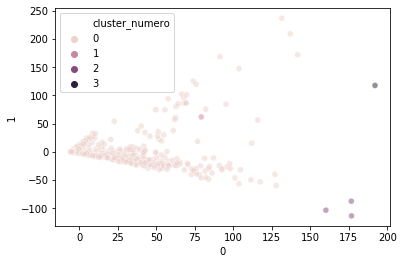

In [351]:
sns.scatterplot(x = pcametrics[0], y = pcametrics[1],hue = labelsnor_hiesimples[0]['cluster_numero'], legend = 'brief',  alpha = 0.5)

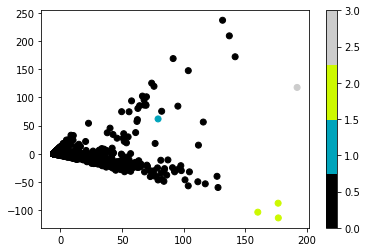

In [352]:
plt.figure()
plt.scatter(pcametrics[0], pcametrics[1], c=labelsnor_hiesimples[0]['cluster_numero'], cmap=plt.cm.get_cmap('nipy_spectral', 4))
plt.colorbar()
plt.show()

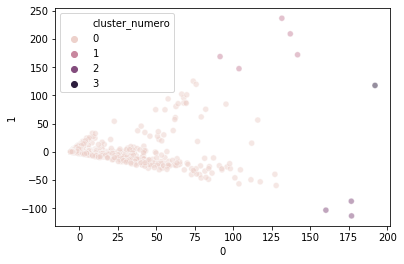

In [347]:
sns.scatterplot(x = pcametrics[0], y = pcametrics[1],hue = labelsnor_hiecompleto[0]['cluster_numero'], legend = 'brief',  alpha = 0.5)

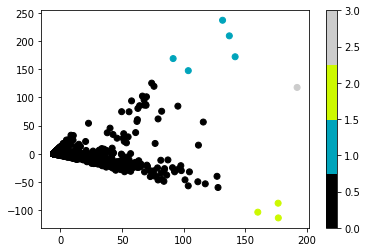

In [350]:
plt.figure()
plt.scatter(pcametrics[0], pcametrics[1], c=labelsnor_hiecompleto[0]['cluster_numero'], cmap=plt.cm.get_cmap('nipy_spectral', 4))
plt.colorbar()
plt.show()

In [274]:
tsne = manifold.TSNE(n_components = 2)
tsne_df = pd.DataFrame(tsne.fit_transform(normalizacao))



In [344]:
tsne_df.head()

,0,1
0,29.562815,-45.927055
1,28.748323,52.370358
2,2.020931,-17.525232
3,38.378956,46.660995
4,13.034575,61.337158


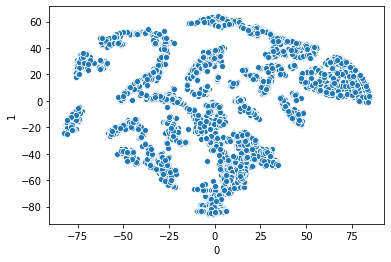

In [292]:
sns.scatterplot(x = tsne_df[0], y = tsne_df[1], data = tsne_df, legend = 'brief')

In [284]:
colors = ['red','green','blue','yellow']

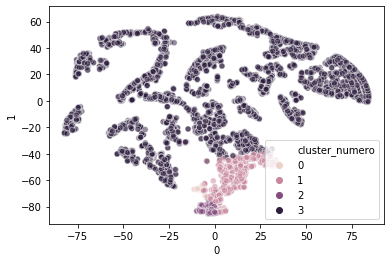

In [290]:
sns.scatterplot(x = tsne_df[0], y = tsne_df[1], hue = labelnor_kmeans[0]['cluster_numero'], legend = 'brief',  alpha = 0.5)

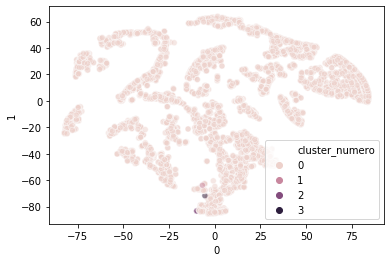

In [283]:
sns.scatterplot(x = tsne_df[0], y = tsne_df[1],hue = labelsnor_hiesimples[0]['cluster_numero'], legend = 'brief',  alpha = 0.5)

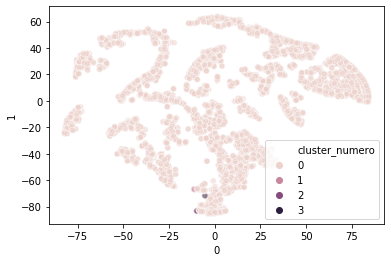

In [281]:
sns.scatterplot(x = tsne_df[0], y = tsne_df[1],hue = labelsnor_hiecompleto[0]['cluster_numero'], legend = 'brief',  alpha = 0.5)